In [103]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install matplotlib


import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [104]:
import pandas as pd
import seaborn as sns
sns.set()
df = pd.read_csv(r"https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv")
#df['Date Submitted'] = pd.to_datetime(df['Date Submitted'])
#df['Date Submitted'] = df['Date Submitted'].dt.strftime('%Y-%m-%d')
#df['Workout Date'] = pd.to_datetime(df['Workout Date'])
#df['Workout Date'] = df['Workout Date'].dt.strftime('%Y-%m-%d')
temp = df 
temp.info()
temp.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date Submitted          719 non-null    object 
 1   Workout Date            719 non-null    object 
 2   Activity Type           719 non-null    object 
 3   Calories Burned (kCal)  719 non-null    int64  
 4   Distance (mi)           719 non-null    float64
 5   Workout Time (seconds)  719 non-null    int64  
 6   Avg Pace (min/mi)       719 non-null    float64
 7   Max Pace (min/mi)       719 non-null    float64
 8   Avg Speed (mi/h)        719 non-null    float64
 9   Max Speed (mi/h)        719 non-null    float64
 10  Avg Heart Rate          479 non-null    float64
 11  Steps                   696 non-null    float64
 12  Notes                   719 non-null    object 
 13  Source                  719 non-null    object 
 14  Link                    719 non-null    ob

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link
0,2022-08-22,2022-08-22,Indoor Run / Jog,414,3.09999,1801,9.6828,9.95841,6.19656,6.02506,144.0,4599.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6797274268
1,2022-08-20,2022-08-20,Run,1544,13.11000,11065,14.0669,7.71115,4.26534,7.78094,140.0,22531.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6793063441


In [105]:
df['Date Submitted'] = pd.to_datetime(df['Date Submitted'], format='%Y-%m-%d')
df['Workout Date'] = pd.to_datetime(df['Workout Date'], format='%Y-%m-%d')
df.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link
0,2022-08-22,2022-08-22,Indoor Run / Jog,414,3.09999,1801,9.68280,9.95841,6.19656,6.02506,144.0,4599.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6797274268
1,2022-08-20,2022-08-20,Run,1544,13.11000,11065,14.06690,7.71115,4.26534,7.78094,140.0,22531.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6793063441
2,2022-08-17,2022-08-17,Indoor Run / Jog,859,6.56000,3600,9.14634,10.36540,6.56000,5.78848,147.0,9295.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6786805174
3,2022-08-15,2022-08-15,Indoor Run / Jog,632,4.74000,3600,12.65820,10.42180,4.74000,5.75715,122.0,8146.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6781978366
4,2022-08-14,2022-08-14,Run,618,6.38464,4663,12.17350,8.81793,4.92875,6.80432,128.0,11001.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6779701822


In [106]:
headers_dict = {'Workout Date': 'Workout_Date', 'Avg Pace (min/mi)': 'Avg_Pace', 'Distance (mi)':'Distance', 'Avg Speed (mi/h)':'Avg_Speed', 'Avg Heart Rate':'Avg_Heart_Rate', 'Calories Burned (kCal)':'Calories_Burned', 'Workout Time (seconds)': 'Workout_Time', 'Max Pace (min/mi)':'Max_Pace', 'Max Pace':'Max_Pace', 'Date Submitted':'Date_Submitted', 'Activity Type':'Activity_Type', 'Max Speed (mi/h)':'Max_Speed'}
temp.rename(columns = headers_dict, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_Submitted   719 non-null    datetime64[ns]
 1   Workout_Date     719 non-null    datetime64[ns]
 2   Activity_Type    719 non-null    object        
 3   Calories_Burned  719 non-null    int64         
 4   Distance         719 non-null    float64       
 5   Workout_Time     719 non-null    int64         
 6   Avg_Pace         719 non-null    float64       
 7   Max_Pace         719 non-null    float64       
 8   Avg_Speed        719 non-null    float64       
 9   Max_Speed        719 non-null    float64       
 10  Avg_Heart_Rate   479 non-null    float64       
 11  Steps            696 non-null    float64       
 12  Notes            719 non-null    object        
 13  Source           719 non-null    object        
 14  Link             719 non-null    object   

In [107]:
mean_speed = temp['Avg_Heart_Rate'].mean()
#temp['Avg_Heart_Rate'].fillna(value = mean_value, inplace = True)

#step_value = temp['Steps'].mean()
#temp['Steps'].fillna(value = step_value, inplace = True)
temp['day_of_week']=temp['Workout_Date'].dt.day_name()
temp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_Submitted   719 non-null    datetime64[ns]
 1   Workout_Date     719 non-null    datetime64[ns]
 2   Activity_Type    719 non-null    object        
 3   Calories_Burned  719 non-null    int64         
 4   Distance         719 non-null    float64       
 5   Workout_Time     719 non-null    int64         
 6   Avg_Pace         719 non-null    float64       
 7   Max_Pace         719 non-null    float64       
 8   Avg_Speed        719 non-null    float64       
 9   Max_Speed        719 non-null    float64       
 10  Avg_Heart_Rate   479 non-null    float64       
 11  Steps            696 non-null    float64       
 12  Notes            719 non-null    object        
 13  Source           719 non-null    object        
 14  Link             719 non-null    object   

In [108]:
temp[temp.Avg_Heart_Rate == 0] = np.nan
#temp[temp.Max_Pace == 0] = np.nan


In [109]:
temp.fillna(temp.Avg_Heart_Rate.median(), inplace = True)
#temp.fillna(temp.Max_Pace.median(), inplace = True)
temp.head()

,Date_Submitted,Workout_Date,Activity_Type,Calories_Burned,Distance,Workout_Time,Avg_Pace,Max_Pace,Avg_Speed,Max_Speed,Avg_Heart_Rate,Steps,Notes,Source,Link,day_of_week
0,2022-08-22 00:00:00,2022-08-22 00:00:00,Indoor Run / Jog,414.0,3.09999,1801.0,9.68280,9.95841,6.19656,6.02506,144.0,4599.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6797274268,Monday
1,2022-08-20 00:00:00,2022-08-20 00:00:00,Run,1544.0,13.11000,11065.0,14.06690,7.71115,4.26534,7.78094,140.0,22531.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6793063441,Saturday
2,2022-08-17 00:00:00,2022-08-17 00:00:00,Indoor Run / Jog,859.0,6.56000,3600.0,9.14634,10.36540,6.56000,5.78848,147.0,9295.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6786805174,Wednesday
3,2022-08-15 00:00:00,2022-08-15 00:00:00,Indoor Run / Jog,632.0,4.74000,3600.0,12.65820,10.42180,4.74000,5.75715,122.0,8146.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6781978366,Monday
4,2022-08-14 00:00:00,2022-08-14 00:00:00,Run,618.0,6.38464,4663.0,12.17350,8.81793,4.92875,6.80432,128.0,11001.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6779701822,Sunday


In [110]:
temp_df = pd.DataFrame(temp)
temp_df.drop(['Notes', 'Source', 'Link', 'Max_Speed', 'Max_Pace'], axis = 1, inplace = True)
temp_df.rename(columns = headers_dict, inplace=True)
upd = temp_df.round(2)
upd2 =upd
upd3 = upd2[upd2['Avg_Pace'].between(6, 14)]
upd4 = upd3[upd3['Avg_Speed'] > 3]
upd4.sort_values(by=['Workout_Date'], ascending=True)
#upd5 = upd4[upd4['Avg_Pace'] < 13]
df = upd4[upd4['Activity_Type'] == 'Run']
df['Calculated'] = df['Workout_Time'] / 60
df.count()

Date_Submitted     492
Workout_Date       492
Activity_Type      492
Calories_Burned    492
Distance           492
Workout_Time       492
Avg_Pace           492
Avg_Speed          492
Avg_Heart_Rate     492
Steps              492
day_of_week        492
Calculated         492
dtype: int64

In [111]:
df['Workout_Date'] = pd.to_datetime(df['Workout_Date'])
#df.drop(['Max_Pace', 'Max Speed'])
df.sort_values(by=['Workout_Date'], ascending=False)

,Date_Submitted,Workout_Date,Activity_Type,Calories_Burned,Distance,Workout_Time,Avg_Pace,Avg_Speed,Avg_Heart_Rate,Steps,day_of_week,Calculated
4,2022-08-14 00:00:00,2022-08-14,Run,618.0,6.38,4663.0,12.17,4.93,128.0,11001.0,Sunday,77.716667
6,2022-08-11 00:00:00,2022-08-11,Run,576.0,4.63,3712.0,13.37,4.49,116.0,7878.0,Thursday,61.866667
7,2022-08-10 00:00:00,2022-08-10,Run,863.0,7.02,4441.0,10.54,5.69,144.0,11520.0,Wednesday,74.016667
8,2022-08-09 00:00:00,2022-08-09,Run,626.0,6.35,4274.0,11.21,5.35,145.0,11074.0,Tuesday,71.233333
9,2022-08-08 00:00:00,2022-08-08,Run,797.0,6.35,4013.0,10.53,5.70,146.0,10360.0,Monday,66.883333
...,...,...,...,...,...,...,...,...,...,...,...,...
675,2019-07-04 00:00:00,2019-07-04,Run,156.0,1.53,816.0,8.88,6.76,159.0,2215.0,Thursday,13.600000
678,2019-07-02 00:00:00,2019-07-02,Run,95.0,1.02,552.0,9.02,6.65,148.0,1439.0,Tuesday,9.200000
683,2019-06-29 00:00:00,2019-06-29,Run,118.0,1.27,693.0,9.13,6.57,150.0,1824.0,Saturday,11.550000
698,2019-06-08 00:00:00,2019-06-08,Run,190.0,1.57,1307.0,13.84,4.33,116.0,2729.0,Saturday,21.783333


In [112]:
df3 = (df[['Workout_Date','Calories_Burned','Distance','Workout_Time', 'Avg_Pace', 'Avg_Speed', 'Avg_Heart_Rate', 'Steps', 'Calculated', 'day_of_week']]).rename(columns={"Calculated" : "Minutes"})
df3[['Minutes']] = df3[['Minutes']].round(2)
df3.head()

,Workout_Date,Calories_Burned,Distance,Workout_Time,Avg_Pace,Avg_Speed,Avg_Heart_Rate,Steps,Minutes,day_of_week
4,2022-08-14,618.0,6.38,4663.0,12.17,4.93,128.0,11001.0,77.72,Sunday
6,2022-08-11,576.0,4.63,3712.0,13.37,4.49,116.0,7878.0,61.87,Thursday
7,2022-08-10,863.0,7.02,4441.0,10.54,5.69,144.0,11520.0,74.02,Wednesday
8,2022-08-09,626.0,6.35,4274.0,11.21,5.35,145.0,11074.0,71.23,Tuesday
9,2022-08-08,797.0,6.35,4013.0,10.53,5.70,146.0,10360.0,66.88,Monday


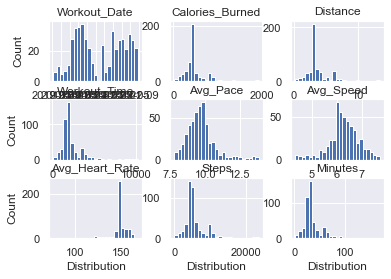

In [113]:
# To create four separate plots, use Pandas `.hist` method
axList = df3.hist(bins=25)

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Distribution')
        
    if ax.is_first_col():
        ax.set_ylabel('Count')
### END SOLUTION

Text(0.5, 1.0, 'Category Histogram')

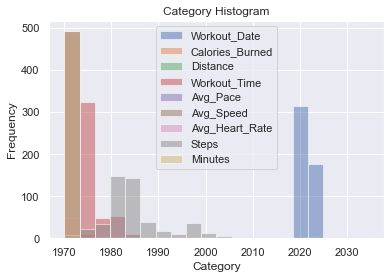

In [114]:
import seaborn as sns
sns.set_context('notebook')
# This uses the `.plot.hist` method
ax = df3.plot.hist(bins=20, alpha=0.5)
ax.set_xlabel('Category');
plt.title('Category Histogram')

## Pandas boxplot

Using Pandas, make a boxplot of each measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

array([[<AxesSubplot:title={'center':'Avg_Heart_Rate'}, xlabel='[day_of_week]'>,
        <AxesSubplot:title={'center':'Avg_Pace'}, xlabel='[day_of_week]'>,
        <AxesSubplot:title={'center':'Avg_Speed'}, xlabel='[day_of_week]'>],
       [<AxesSubplot:title={'center':'Calories_Burned'}, xlabel='[day_of_week]'>,
        <AxesSubplot:title={'center':'Distance'}, xlabel='[day_of_week]'>,
        <AxesSubplot:title={'center':'Minutes'}, xlabel='[day_of_week]'>],
       [<AxesSubplot:title={'center':'Steps'}, xlabel='[day_of_week]'>,
        <AxesSubplot:title={'center':'Workout_Time'}, xlabel='[day_of_week]'>,
        <AxesSubplot:>]], dtype=object)

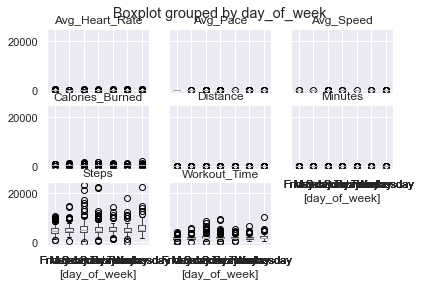

In [115]:
df3.boxplot(by='day_of_week')


## Barplot

In [116]:
df3.head()

,Workout_Date,Calories_Burned,Distance,Workout_Time,Avg_Pace,Avg_Speed,Avg_Heart_Rate,Steps,Minutes,day_of_week
4,2022-08-14,618.0,6.38,4663.0,12.17,4.93,128.0,11001.0,77.72,Sunday
6,2022-08-11,576.0,4.63,3712.0,13.37,4.49,116.0,7878.0,61.87,Thursday
7,2022-08-10,863.0,7.02,4441.0,10.54,5.69,144.0,11520.0,74.02,Wednesday
8,2022-08-09,626.0,6.35,4274.0,11.21,5.35,145.0,11074.0,71.23,Tuesday
9,2022-08-08,797.0,6.35,4013.0,10.53,5.70,146.0,10360.0,66.88,Monday


In [117]:
df3['day_of_week']=df3['Workout_Date'].dt.day_name()
df3.head()

,Workout_Date,Calories_Burned,Distance,Workout_Time,Avg_Pace,Avg_Speed,Avg_Heart_Rate,Steps,Minutes,day_of_week
4,2022-08-14,618.0,6.38,4663.0,12.17,4.93,128.0,11001.0,77.72,Sunday
6,2022-08-11,576.0,4.63,3712.0,13.37,4.49,116.0,7878.0,61.87,Thursday
7,2022-08-10,863.0,7.02,4441.0,10.54,5.69,144.0,11520.0,74.02,Wednesday
8,2022-08-09,626.0,6.35,4274.0,11.21,5.35,145.0,11074.0,71.23,Tuesday
9,2022-08-08,797.0,6.35,4013.0,10.53,5.70,146.0,10360.0,66.88,Monday


In [118]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

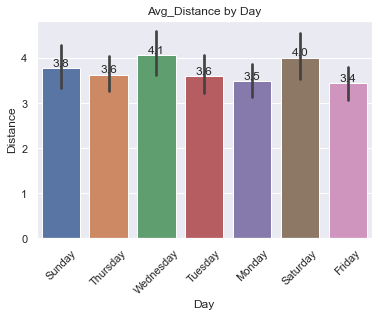

In [119]:
days = sns.barplot(x='day_of_week',y='Distance', data=df3)
plt.ylabel('Distance')
plt.xlabel('Day')
plt.xticks(rotation = 45)
plt.title('Avg_Distance by Day')
show_values(days)

In [120]:
df3.columns

Index(['Workout_Date', 'Calories_Burned', 'Distance', 'Workout_Time',
       'Avg_Pace', 'Avg_Speed', 'Avg_Heart_Rate', 'Steps', 'Minutes',
       'day_of_week'],
      dtype='object')

Text(0.5, 1.0, 'Minutes by Distance')

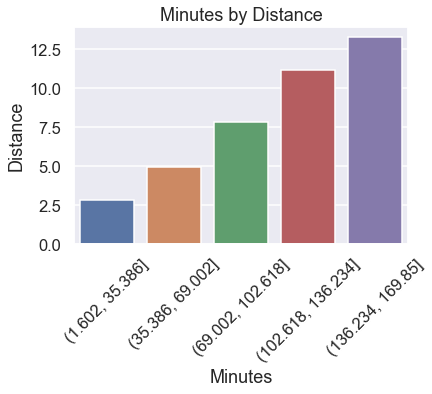

In [121]:
sns.set_context("talk")

sns.barplot(y='Distance', x=pd.cut(
    df3['Minutes'], bins = 5),
    data=df3, ci=None)

plt.ylabel('Distance')
plt.xlabel('Minutes')
plt.xticks(rotation = 45)
plt.title('Minutes by Distance')

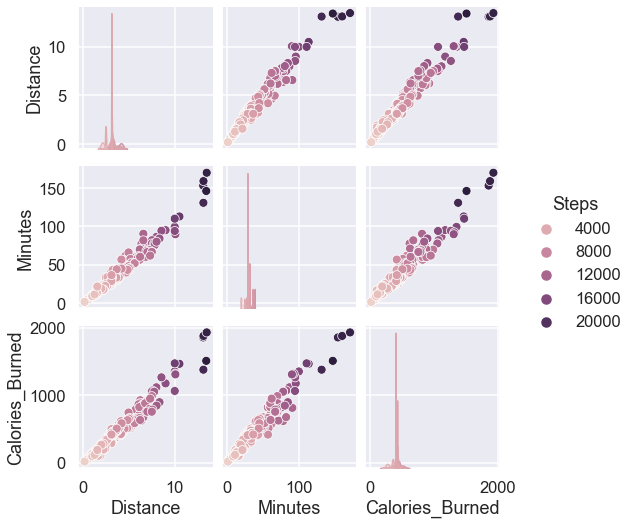

In [122]:
pairplot = df3[['Distance', 'Steps', 'Minutes', 'Calories_Burned']]
sns.pairplot(pairplot, hue='Steps')

Text(0.0, 1.2, 'Minutes by Distance')

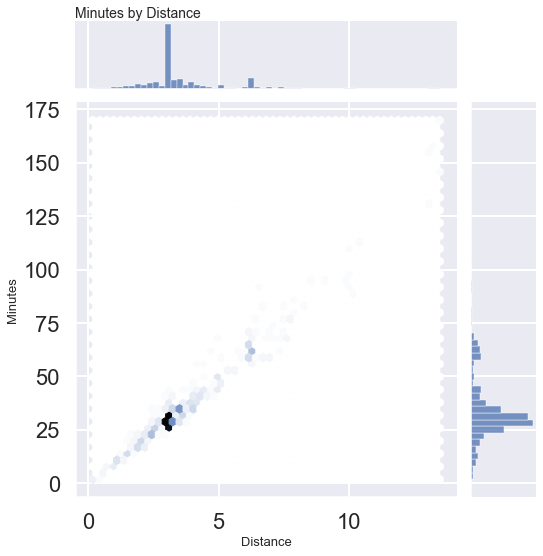

In [123]:
import matplotlib.pyplot as plt
sns.set_context("poster")
jplot = sns.jointplot(x=df3['Distance'], y=df3['Minutes'], kind='hex')
#jplot.fig.suptitle('Minutes by Steps', loc = 'right', fontsize = 14)
plt.ylabel('Minutes', fontsize = 13)
plt.xlabel('Distance', fontsize = 13)
#plt.xticks(rotation = 45)
jplot.fig.set_figwidth(9)
jplot.fig.set_figheight(9)
plt.title('Minutes by Distance', y = 1.2, loc = 'left', fontsize = 14)


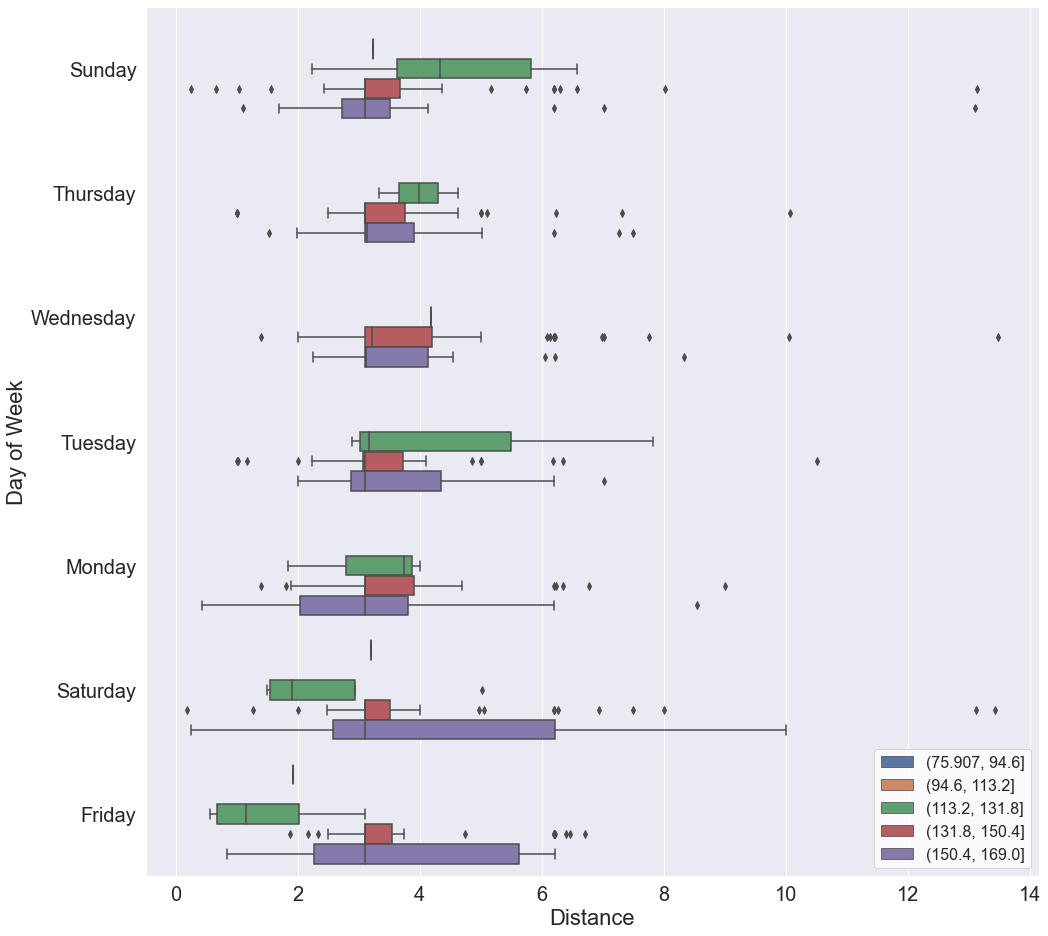

In [124]:
sns.set(rc={"figure.figsize":(16, 16)}) #width=8, height=4
jbox = sns.boxplot(x = 'Distance', y='day_of_week', data=df3, orient = 'h', hue = (pd.cut(df3['Avg_Heart_Rate'], bins = 5)))
sns.set_theme(style="whitegrid")
plt.ylabel('Day of Week', fontsize=22)
plt.xlabel('Distance', fontsize=22)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 16)

## Parametric vs. Non-parametric

Parametric (finite number of distributions)

Non-parametric we make fewer assumptions

Maximum Likelihood Estimation: Related to probability and is a function of the parameters model.

Uniform distribution (uniform because there is an equal chance you will get any of the values as an output of the distribution)

Gaussian/Normal - Most likely value is the value closest to the mean. Further out values are equally unlikely.

Central limit theorum - take the average value from random samples. The distribution of those averages will be a normal curve. 

Log Normal - If you take the log of a variable you will have the normal distribution.

Exponential Curve - Most values closer to the left side. Often used to same what will be the amount of time before the next event.

Poisson - The number of events that happen during a certain amount of time. 

### Frequentist - Repeated observations in the limit.

Queueing theory - study of working with queues or lines. How much supply do we need to handle the demand (web servers for frequencies, waiters for customers at a restaurant)

Processes may have true frequencies - we are interested in modeling as many repeats of an experiment as possible. If the sample is large enough, we will have seen enough queues or lines to infer an estimate of our probabilities.

Derive the probalistic property of a procedure.

The more data we have the more confident we can be.

Apply the probability directly to the observed data.

### Bayesian - Describes parameters by probability distributions

Before seeing any data, a prior distribution is formulated. X amount of people in line at a certain time period will allow us to have an estimated guess.

Prior distributed is updated after seeing the data. Our initial estimate updates once data is introduced.

The updated data is referred to as posterior distribution.

Same math and same data - the differences is the interpretation.

In [125]:
# sns.set_style('white')
# sns.set_context('notebook')
# sns.set_palette('dark')

# f = plt.figure(figsize=(6,4))
# sns.boxplot(x='Distance', y='Avg_Heart_Rate', 
#             hue='Avg_Pace', data=df2);

<AxesSubplot:>

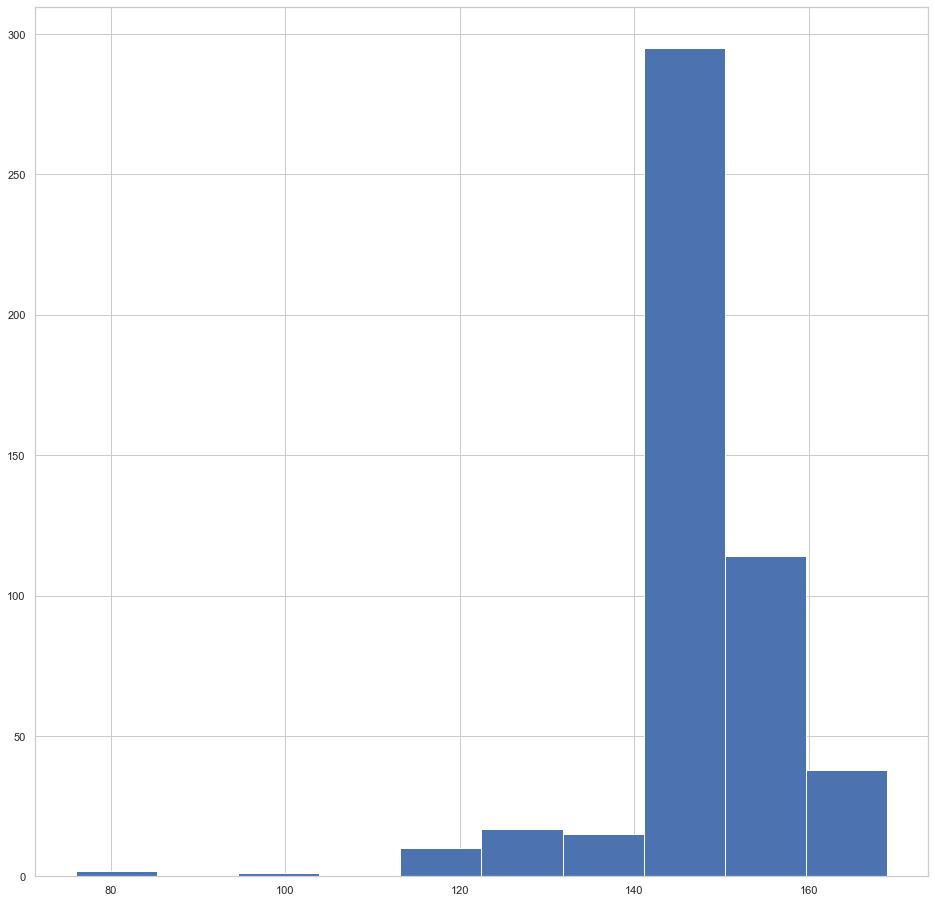

In [126]:
df3.Avg_Heart_Rate.hist()

array([[<AxesSubplot:title={'center':'Workout_Date'}>,
        <AxesSubplot:title={'center':'Calories_Burned'}>,
        <AxesSubplot:title={'center':'Distance'}>],
       [<AxesSubplot:title={'center':'Workout_Time'}>,
        <AxesSubplot:title={'center':'Avg_Pace'}>,
        <AxesSubplot:title={'center':'Avg_Speed'}>],
       [<AxesSubplot:title={'center':'Avg_Heart_Rate'}>,
        <AxesSubplot:title={'center':'Steps'}>,
        <AxesSubplot:title={'center':'Minutes'}>]], dtype=object)

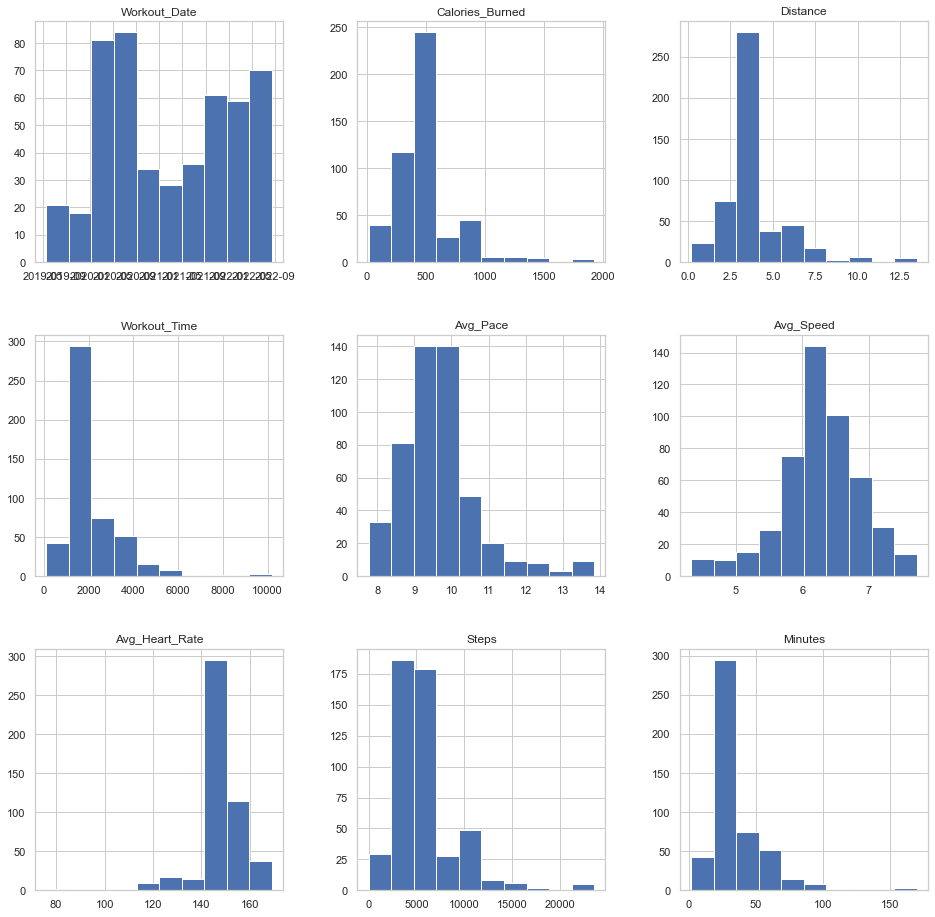

In [127]:
df3.hist()

In [128]:
from scipy.stats.mstats import normaltest
normaltest(df3.Distance.values)

NormaltestResult(statistic=231.87881185206027, pvalue=4.4479077481819786e-51)

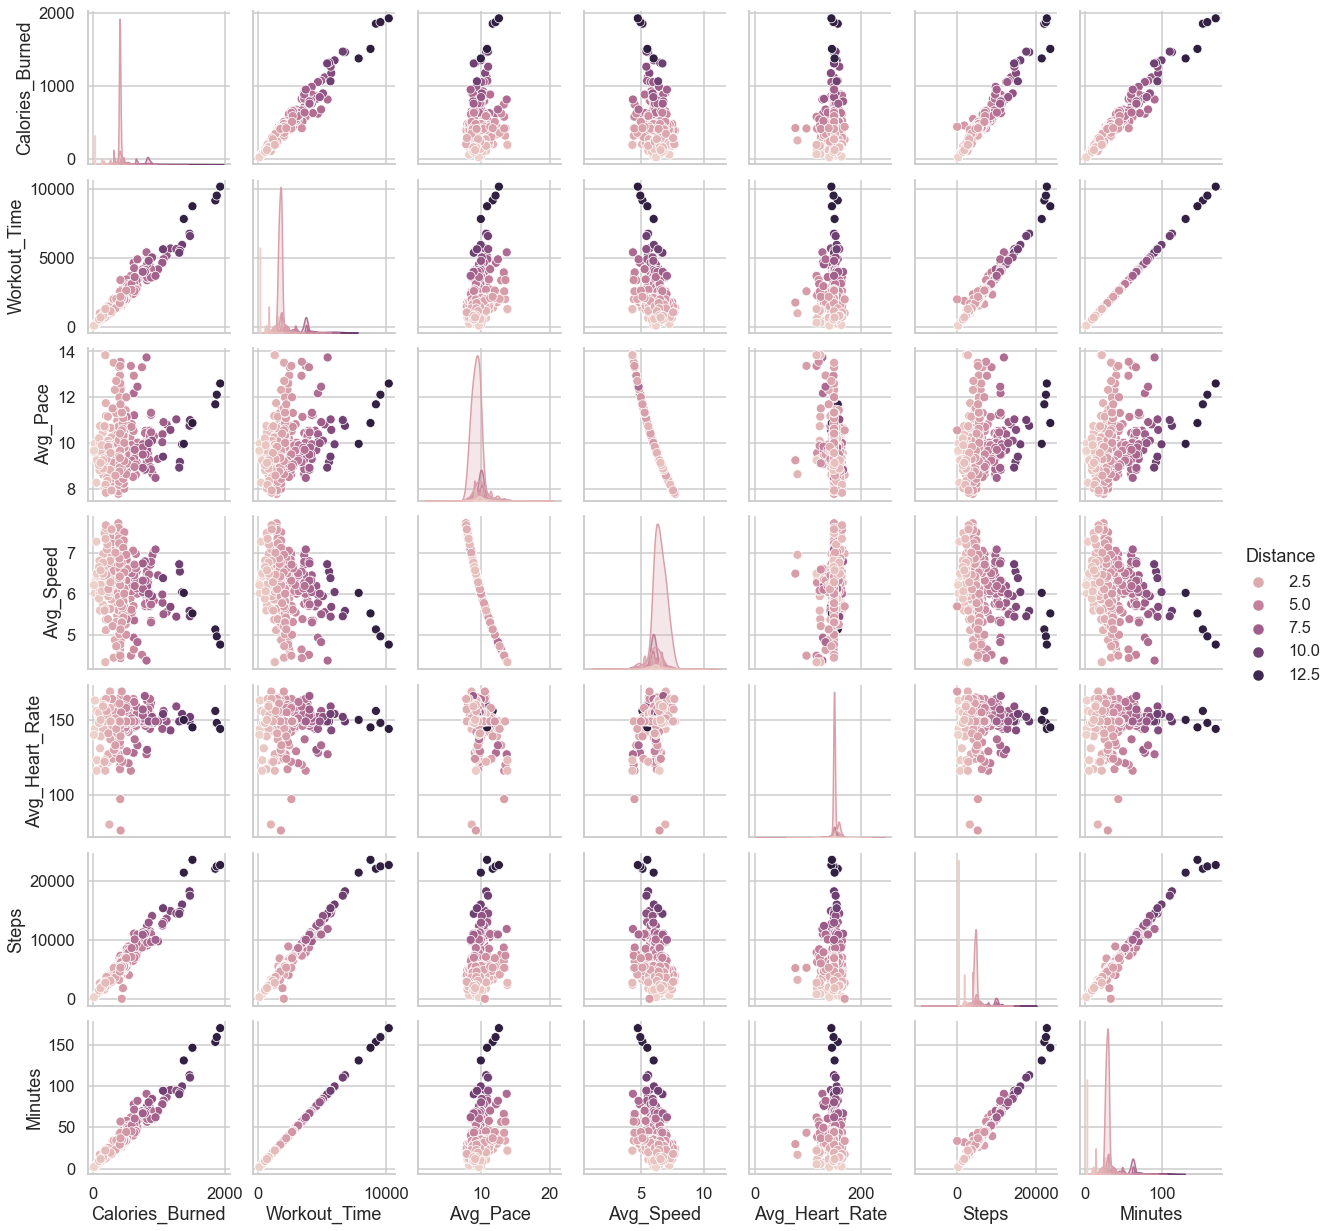

In [129]:
sns.set_context('talk')
sns.pairplot(df3, hue='Distance');

## Hypothesis Testing

## Interpretation and Prediction

Gather x, y; Train the model by finding the best prediction

Focus on 

## Transformation of Data Distribution

In [130]:
from numpy import log
from scipy.stats import boxcox

# Machine Learning

## Linear Regression

In [133]:
%pip install helper
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from helper import *

import warnings
warnings.simplefilter("ignore")

Note: you may need to restart the kernel to use updated packages.


In [134]:
df3.head()


,Workout_Date,Calories_Burned,Distance,Workout_Time,Avg_Pace,Avg_Speed,Avg_Heart_Rate,Steps,Minutes,day_of_week
4,2022-08-14,618.0,6.38,4663.0,12.17,4.93,128.0,11001.0,77.72,Sunday
6,2022-08-11,576.0,4.63,3712.0,13.37,4.49,116.0,7878.0,61.87,Thursday
7,2022-08-10,863.0,7.02,4441.0,10.54,5.69,144.0,11520.0,74.02,Wednesday
8,2022-08-09,626.0,6.35,4274.0,11.21,5.35,145.0,11074.0,71.23,Tuesday
9,2022-08-08,797.0,6.35,4013.0,10.53,5.70,146.0,10360.0,66.88,Monday


In [135]:
df4 = df3.drop(['Workout_Date', 'day_of_week'], axis = 1)
df4.columns

Index(['Calories_Burned', 'Distance', 'Workout_Time', 'Avg_Pace', 'Avg_Speed',
       'Avg_Heart_Rate', 'Steps', 'Minutes'],
      dtype='object')

#### Visually

Plotting a histogram:

<AxesSubplot:>

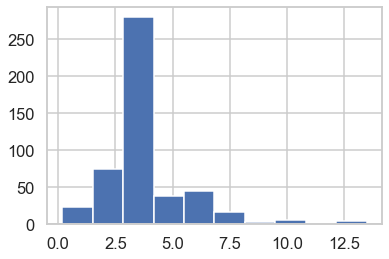

In [136]:
df4.Distance.hist()

Does not look normal due to that right tail. Let's try to verify statistically:

In [137]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

Without getting into Bayesian vs. frequentist debates, for the purposes of this lesson, the following will suffice:

* This is a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect, but suffice it to say: 
    * This test outputs a "p-value". The _higher_ this p-value is the _closer_ the distribution is to normal.
    * Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.

In [138]:
normaltest(df4.Distance.values)

NormaltestResult(statistic=231.87881185206027, pvalue=4.4479077481819786e-51)

p-value _extremely_ low. Our y variable we've been dealing with this whole time was not normally distributed!

Linear Regression assumes a normally distributed residuals which can be aided by transforming y variable. Let's try some common transformations to try and get y to be normally distributed: 

* Log
* Square root
* Box cox

### Testing log

The log transform can transform data that is significantly skewed right to be more normally distributed:

In [139]:
log_dist = np.log(df4.Distance)

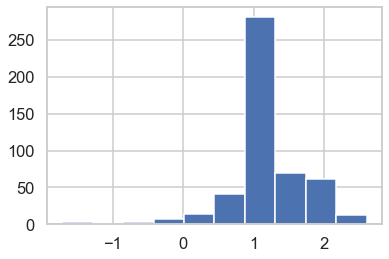

In [140]:
log_dist.hist();

In [141]:
normaltest(log_dist)

NormaltestResult(statistic=139.9850206589109, pvalue=4.005336325343659e-31)

Conclusion: closer, but still not normal.

### Exercise: 

The square root transformation is another transformation that can transform non-normally distributed data into normally distributed data:

(array([  5.,  11.,  23.,  63., 278.,  36.,  52.,  13.,   6.,   5.]),
 array([0.42426407, 0.74898886, 1.07371364, 1.39843843, 1.72316322,
        2.04788801, 2.3726128 , 2.69733759, 3.02206237, 3.34678716,
        3.67151195]),
 <BarContainer object of 10 artists>)

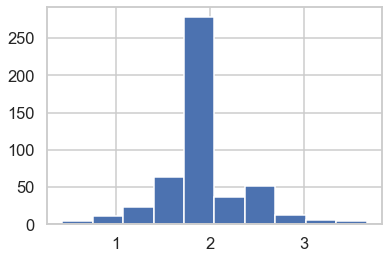

In [142]:
# Instructor Solution

sqrt_dist = np.sqrt(df4.Distance)
plt.hist(sqrt_dist)

### Box cox

The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

You can think of as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.

In [143]:
from scipy.stats import boxcox

In [144]:
bc_result = boxcox(df4.Distance)
boxcox_dist = bc_result[0]
lam = bc_result[1]

In [145]:
lam

0.29057462922670857

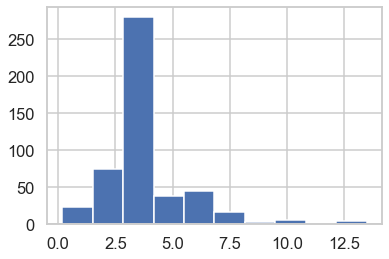

In [146]:
df4['Distance'].hist();

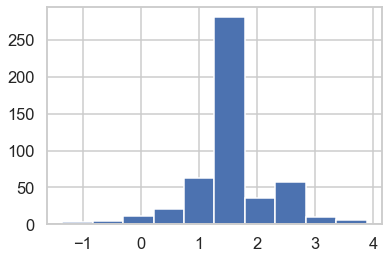

In [147]:
plt.hist(boxcox_dist);

In [148]:
normaltest(boxcox_dist)

NormaltestResult(statistic=37.22946287679224, pvalue=8.236161504476277e-09)

Significantly more normally distributed (according to p value) than the other two distributions - above 0.05, even!

Now that we have a normally distributed y-variable, let's try a regression!

### Testing regression:

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [150]:
lr = LinearRegression()

In [151]:
y_col = "Distance"

X = df4.drop(y_col, axis=1)
y = df4[y_col]

**Create Polynomial Features**

In [152]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

**Train test split**

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)

**Fit `StandardScaler` on `X_train` as before**

In [154]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [155]:
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

As before, we'll now:

1. Fit regression
1. Transform testing data
1. Predict on testing data

In [156]:
y_train_bc.shape

(344,)

In [157]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

### Discussion

* Are we done?
* What did we predict?
* How would you interpret these predictions?

#### Inverse transform

Every transformation has an inverse transformation. The inverse transformation of $f(x) = \sqrt{x}$ is $f^{-1}(x) = x^2$, for example. Box cox has an inverse transformation as well: notice that we have to pass in the lambda value that we found from before:

In [158]:
from scipy.special import inv_boxcox

In [159]:
# code from above
bc_result = boxcox(df4.Distance)
boxcox_dist = bc_result[0]
lam = bc_result[1]

In [160]:
inv_boxcox(boxcox_dist, lam)[:10]

array([6.38, 4.63, 7.02, 6.35, 6.35, 2.37, 6.09, 8.  , 3.16, 3.1 ])

In [161]:
df4['Distance'].values[:10]

array([6.38, 4.63, 7.02, 6.35, 6.35, 2.37, 6.09, 8.  , 3.16, 3.1 ])

In [162]:
# Instructor Solution
y_pred_tran = inv_boxcox(y_pred_bc,lam2)
r2_score(y_pred_tran,y_test)

0.8790431858098344

## LAB Exercise: 

### Determine the R^2 of a LinearRegression without the box cox transformation. Is it higher or lower?

In [163]:
### BEGIN SOLUTION
lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(lr_pred,y_test)
### END SOLUTION

0.9999828256704058

In [164]:
normaltest(sqrt_dist)

NormaltestResult(statistic=79.34499649336081, pvalue=5.8945808404528105e-18)

## Train / Test Models

In [165]:
mask = df4.dtypes == np.object
categorical_cols = df4.columns[mask]

In [166]:
# Determine how many extra columns would be created
import numpy as np
num_ohc_cols = (df4[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 215 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

0.0

In [167]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = df4.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [168]:
# Column difference is as calculated above
data_ohc.shape[1] - df4.shape[1]

0

In [169]:
from sklearn.model_selection import train_test_split

y_col = 'Distance'

# Split the data that is not one-hot encoded
feature_cols = [x for x in df4.columns if x != y_col]
X_data = df4[feature_cols]
y_data = df4[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)
# Split the data that is one-hot encoded
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, 
                                                    test_size=0.3, random_state=42)

In [170]:
# Compare the indices to ensure they are identical
(X_train_ohc.index == X_train.index).all()

True

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for error values
error_df = list()

# Data that have not been one-hot encoded
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test,  y_test_pred)},
                           name='no enc'))

# Data that have been one-hot encoded
LR = LR.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)

error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test' : mean_squared_error(y_test_ohc,  y_test_ohc_pred)},
                          name='one-hot enc'))

# Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df

,no enc,one-hot enc
train,0.026571,0.026571
test,0.056817,0.056817


In [172]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

In [173]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


scalers = {'standard': StandardScaler(),
           'minmax': MinMaxScaler(),
           'maxabs': MaxAbsScaler()}

training_test_sets = {
    'not_encoded': (X_train, y_train, X_test, y_test),
    'one_hot_encoded': (X_train_ohc, y_train_ohc, X_test_ohc, y_test_ohc)}


# Get the list of float columns, and the float data
# so that we don't scale something we already scaled. 
# We're supposed to scale the original data each time
mask = X_train.dtypes == np.float
float_columns = X_train.columns[mask]

# initialize model
LR = LinearRegression()

# iterate over all possible combinations and get the errors
errors = {}
for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_sets.items():
    for scaler_label, scaler in scalers.items():
        trainingset = _X_train.copy()  # copy because we dont want to scale this more than once.
        testset = _X_test.copy()
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])
        LR.fit(trainingset, _y_train)
        predictions = LR.predict(testset)
        key = encoding_label + ' - ' + scaler_label + 'scaling'
        errors[key] = mean_squared_error(_y_test, predictions)

errors = pd.Series(errors)
print(errors.to_string())
print('-' * 80)
for key, error_val in errors.items():
    print(key, error_val)

not_encoded - standardscaling        0.056817
not_encoded - minmaxscaling          0.056817
not_encoded - maxabsscaling          0.056817
one_hot_encoded - standardscaling    0.056817
one_hot_encoded - minmaxscaling      0.056817
one_hot_encoded - maxabsscaling      0.056817
--------------------------------------------------------------------------------
not_encoded - standardscaling 0.05681739137861788
not_encoded - minmaxscaling 0.05681739137861801
not_encoded - maxabsscaling 0.05681739137861606
one_hot_encoded - standardscaling 0.05681739137861788
one_hot_encoded - minmaxscaling 0.05681739137861801
one_hot_encoded - maxabsscaling 0.05681739137861606


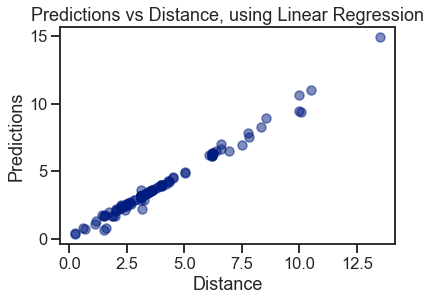

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='Distance', 
       ylabel='Predictions',
       title='Predictions vs Distance, using Linear Regression');

# Machine Learning Foundation

## Section 2, Part c: Cross Validation 

In [175]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [176]:
# verify the shape of the array (rows by a single column)
X = df4.drop('Distance', axis=1)
y = df4.Distance

In [177]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [178]:
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 1  3  4  5  7  8 10 11 12 13] 328
Test index: [ 0  2  6  9 15 17 19 23 25 26] 164

Train index: [ 0  2  6  9 10 11 12 13 15 17] 328
Test index: [ 1  3  4  5  7  8 14 16 22 30] 164

Train index: [0 1 2 3 4 5 6 7 8 9] 328
Test index: [10 11 12 13 18 20 21 24 28 31] 164



In [179]:
s = StandardScaler()
lr = LinearRegression()

In [180]:
estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

In [181]:
kf

KFold(n_splits=3, random_state=72018, shuffle=True)

In [182]:
predictions = cross_val_predict(estimator, X, y, cv=kf)

In [183]:
r2_score(y, predictions)

0.986681894678068

In [184]:
# np.mean(scores) # almost identical!

In [185]:
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [186]:
scores = []
coefs = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

In [187]:
list(zip(alphas,scores))

[(1e-09, 0.986670601401797),
 (1e-08, 0.9866706005334891),
 (1e-07, 0.9866705918484684),
 (1e-06, 0.9866702362371867),
 (1e-05, 0.9866713097144654),
 (0.0001, 0.9866694798539627),
 (0.001, 0.9866502251349352),
 (0.01, 0.986558826089415),
 (0.1, 0.9755446150117234),
 (1.0, 0.6721789215103883)]

In [188]:
Lasso(alpha=1e-6).fit(X, y).coef_

array([ 8.85054981e-04,  1.32306944e-03, -3.09050677e-01, -4.15918572e-02,
       -9.43787095e-04,  1.84355597e-04, -2.29177435e-02])

In [189]:
Lasso(alpha=1.0).fit(X, y).coef_

array([ 0.00241557,  0.00011233, -0.        ,  0.        ,  0.        ,
        0.00036027,  0.        ])

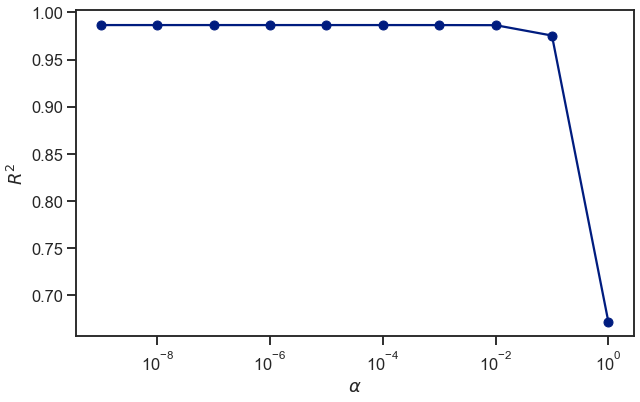

In [190]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [191]:
pf = PolynomialFeatures(degree=3)

scores = []
alphas = np.geomspace(0.06, 6.0, 20)
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)
    

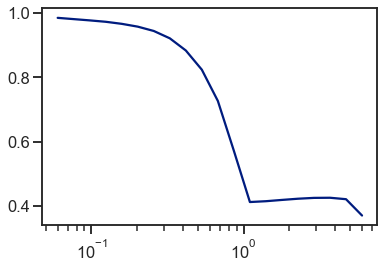

In [192]:
plt.semilogx(alphas, scores);

In [193]:
# Once we have found the hyperparameter (alpha~1e-2=0.01)
# make the model and train it on ALL the data
# Then release it into the wild .....
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

0.9974941899170269

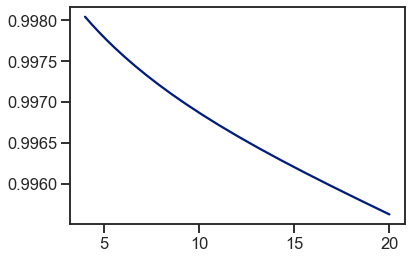

In [194]:
pf = PolynomialFeatures(degree=2)
alphas = np.geomspace(4, 20, 20)
scores=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

plt.plot(alphas, scores)

In [195]:
# Once we have found the hyperparameter (alpha~1e-2=0.01)
# make the model and train it on ALL the data
# Then release it into the wild .....
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

0.9974941899170269

In [196]:
df_importances = pd.DataFrame(zip(best_estimator.named_steps["make_higher_degree"].get_feature_names(),
                 best_estimator.named_steps["lasso_regression"].coef_,
))

In [197]:
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))

In [198]:
col_names_dict

{0: 'Calories_Burned',
 1: 'Workout_Time',
 2: 'Avg_Pace',
 3: 'Avg_Speed',
 4: 'Avg_Heart_Rate',
 5: 'Steps',
 6: 'Minutes'}

In [199]:
df_importances.sort_values(by=1)

,0,1
3,x2,-0.140208
16,x1 x2,-0.076827
10,x0 x2,-0.041123
25,x2 x6,-0.000090
0,1,0.000000
21,x2^2,-0.000000
22,x2 x3,0.000000
23,x2 x4,-0.000000
24,x2 x5,-0.000000
26,x3^2,-0.000000


In [200]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(4, 20, 30)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [201]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 4.        ,  4.22826702,  4.46956049,  4.7246238 ,  4.99424274,
        5.27924796,  5.58051751,  5.89897953,  6.23561514,  6.59146146,
        6.96761476,  7.36523392,  7.78554391,  8.22983963,  8.69948987,
        9.19594151,  9.72072404, 10.27545421, 10.86184103, 11.48169104,
       12.13691388, 12.82952815, 13.56166768, 14.33558803, 15.15367351,
       16.01844446, 16.93256509, 17.89885162, 18.92028098, 20.        ])})

In [202]:
grid.best_score_, grid.best_params_

(0.9979239049763392,
 {'polynomial_features__degree': 2, 'ridge_regression__alpha': 4.0})

In [203]:
y_predict = grid.predict(X)

In [204]:
# This includes both in-sample and out-of-sample
r2_score(y, y_predict)

0.9993728340421802

In [205]:
# Notice that "grid" is a fit object!
# We can use grid.predict(X_test) to get brand new predictions!
grid.best_estimator_.named_steps['ridge_regression'].coef_

array([ 0.00000000e+00,  2.14912132e-01,  7.49880797e-01, -1.59888581e-01,
        1.74216545e-01, -1.57862998e-03,  3.84830613e-01,  7.49870847e-01,
        5.73273620e-02, -2.09379606e-02, -6.45207203e-03,  2.78275027e-02,
        1.03183133e-02, -9.99371516e-02, -2.09287034e-02,  1.75162292e-02,
        1.20691891e-03,  1.22051798e-02,  1.55532626e-02, -1.55383907e-02,
        1.75085365e-02,  4.42201561e-03, -3.10362993e-03,  3.03570705e-02,
       -4.95833724e-02,  1.18709790e-03, -2.97556610e-03,  4.37800486e-02,
        8.00422062e-02,  1.22251107e-02, -6.92696577e-04, -4.03144458e-02,
        1.54820310e-02,  6.59939868e-02, -1.55419838e-02,  1.75008514e-02])

In [206]:
grid.cv_results_

{'mean_fit_time': array([0.00396935, 0.00262348, 0.00230559, 0.00236742, 0.0025239 ,
        0.00415897, 0.00210253, 0.00202362, 0.00264263, 0.00176859,
        0.00222222, 0.00223899, 0.00200168, 0.00183058, 0.00183042,
        0.00201813, 0.00180395, 0.00193008, 0.00199437, 0.00180435,
        0.00214656, 0.00250737, 0.00199469, 0.00196163, 0.00182287,
        0.00198261, 0.00171264, 0.00185243, 0.00175397, 0.00178011,
        0.00203188, 0.00190488, 0.00191339, 0.00188629, 0.00210198,
        0.00201535, 0.00190298, 0.0019327 , 0.0018901 , 0.00192165,
        0.00195432, 0.00211509, 0.002002  , 0.00190194, 0.0019323 ,
        0.00190671, 0.00204436, 0.00201265, 0.00200788, 0.0019811 ,
        0.00193906, 0.00204269, 0.00204873, 0.00197999, 0.00190894,
        0.00188502, 0.00202433, 0.0019412 , 0.00196274, 0.00197045,
        0.00444508, 0.00354107, 0.00458543, 0.00343339, 0.00340978,
        0.00334938, 0.00314037, 0.00235637, 0.00234795, 0.00235653,
        0.00242273, 0.00240922,

NameError: name 'X_real' is not defined

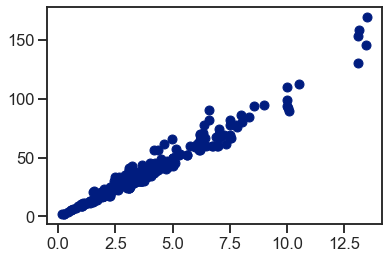

In [210]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Setup the polynomial features
degree = 20
pf = PolynomialFeatures(degree)
lr = LinearRegression()

# Extract the X- and Y- data from the dataframe 
X_data = df4[['Distance']]
Y_data = df4['Minutes']

# Create the features and fit the model
X_poly = pf.fit_transform(X_data)
lr = lr.fit(X_poly, Y_data)
Y_pred = lr.predict(X_poly)

# Plot the result
plt.plot(X_data, Y_data, marker='o', ls='', label='data', alpha=1)
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, marker='^', alpha=.5, label='predictions w/ polynomial features')
plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');


NameError: name 'X_real' is not defined

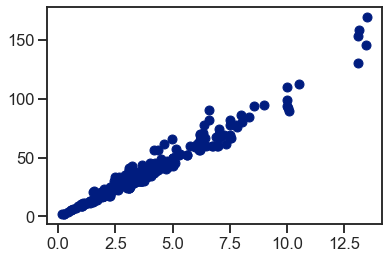

In [211]:
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import Ridge, Lasso

# The ridge regression model
rr = Ridge(alpha=0.001)
rr = rr.fit(X_poly, Y_data)
Y_pred_rr = rr.predict(X_poly)

# The lasso regression model
lassor = Lasso(alpha=0.0001)
lassor = lassor.fit(X_poly, Y_data)
Y_pred_lr = lassor.predict(X_poly)

# The plot of the predicted values
plt.plot(X_data, Y_data, marker='o', ls='', label='data')
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, label='linear regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_rr, label='ridge regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_lr, label='lasso regression', marker='^', alpha=.5)

plt.legend()

ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

In [213]:
# let's look at the absolute value of coefficients for each model

coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_.ravel()
coefficients['ridge regression'] = rr.coef_.ravel()
coefficients['lasso regression'] = lassor.coef_.ravel()
coefficients = coefficients.applymap(abs)

coefficients.describe()  # Huge difference in scale between non-regularized vs regularized regression

,linear regression,ridge regression,lasso regression
count,2.100000e+01,21.000000,2.100000e+01
mean,1.138841e-07,7.381849,4.059591e-01
std,2.045564e-07,11.448778,1.783301e+00
min,0.000000e+00,0.000000,0.000000e+00
25%,2.241415e-11,0.000020,1.389026e-18
50%,2.759181e-09,0.039356,1.707936e-12
75%,1.200161e-07,10.949883,1.546484e-07
max,6.192262e-07,34.746751,8.182384e+00


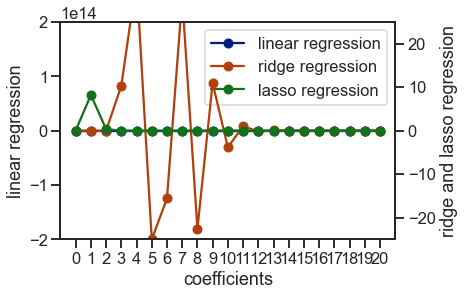

In [214]:
colors = sns.color_palette()

# Setup the dual y-axes
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plot the linear regression data
ax1.plot(lr.coef_.ravel(), 
         color=colors[0], marker='o', label='linear regression')

# Plot the regularization data sets
ax2.plot(rr.coef_.ravel(), 
         color=colors[1], marker='o', label='ridge regression')

ax2.plot(lassor.coef_.ravel(), 
         color=colors[2], marker='o', label='lasso regression')

# Customize axes scales
ax1.set_ylim(-2e14, 2e14)
ax2.set_ylim(-25, 25)

# Combine the legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(lr.coef_)));

In [215]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [216]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

0.23836398926560778


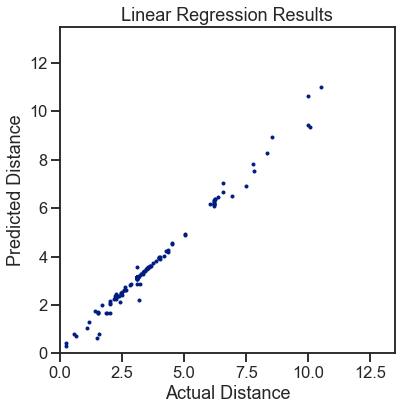

In [217]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Distance', 
       ylabel='Predicted Distance', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

In [218]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

0.23836398926560778


In [219]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

0.05 0.23840209864914813


In [220]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower

0.0005 0.23770529161661647


In [221]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

0.0005 0.9 0.2377628017173054


In [222]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,0.238364
Ridge,0.238402
Lasso,0.237705
ElasticNet,0.237763


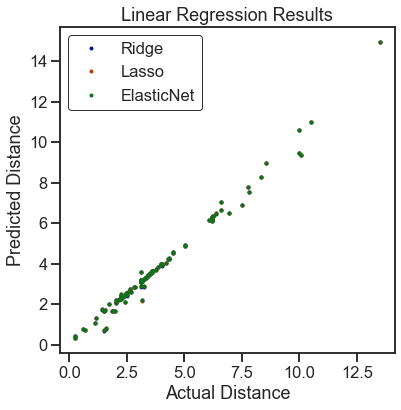

In [223]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Distance', 
       ylabel='Predicted Distance', 
       title='Linear Regression Results');

In [224]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD
Linear,0.238364,7.231396e+15
Ridge,0.238402,2.037808e+16
Lasso,0.237705,1.526213e+16
ElasticNet,0.237763,2.326956e+16


In [225]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(eta0=1e-7, **parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD-learningrate'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate
Linear,0.238364,7.231396e+15,0.393500
Ridge,0.238402,2.037808e+16,0.342078
Lasso,0.237705,1.526213e+16,9.688012
ElasticNet,0.237763,2.326956e+16,0.340727


In [226]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate,RMSE-SGD-scaled
Linear,0.238364,7.231396e+15,0.393500,0.344865
Ridge,0.238402,2.037808e+16,0.342078,1.819025
Lasso,0.237705,1.526213e+16,9.688012,0.350242
ElasticNet,0.237763,2.326956e+16,0.340727,0.350235


In [227]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate,RMSE-SGD-scaled
Linear,0.238364,7.231396e+15,0.393500,0.347533
Ridge,0.238402,2.037808e+16,0.342078,1.823374
Lasso,0.237705,1.526213e+16,9.688012,0.350451
ElasticNet,0.237763,2.326956e+16,0.340727,0.348408


### Train Test Split

In [228]:
df4.head()

,Calories_Burned,Distance,Workout_Time,Avg_Pace,Avg_Speed,Avg_Heart_Rate,Steps,Minutes
4,618.0,6.38,4663.0,12.17,4.93,128.0,11001.0,77.72
6,576.0,4.63,3712.0,13.37,4.49,116.0,7878.0,61.87
7,863.0,7.02,4441.0,10.54,5.69,144.0,11520.0,74.02
8,626.0,6.35,4274.0,11.21,5.35,145.0,11074.0,71.23
9,797.0,6.35,4013.0,10.53,5.70,146.0,10360.0,66.88


In [229]:
X_train, X_test, y_train, y_test = train_test_split(df4[['Distance']], df4['Avg_Pace'], random_state=0)

In [230]:
# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

# Train the model on the training set.
reg.fit(X_train, y_train)

LinearRegression()

In [231]:
# Test the model on the testing set and evaluate the performance
score = reg.score(X_test, y_test)
print(score)

0.052984500442669


### Regression

<AxesSubplot:xlabel='Distance', ylabel='Avg_Pace'>

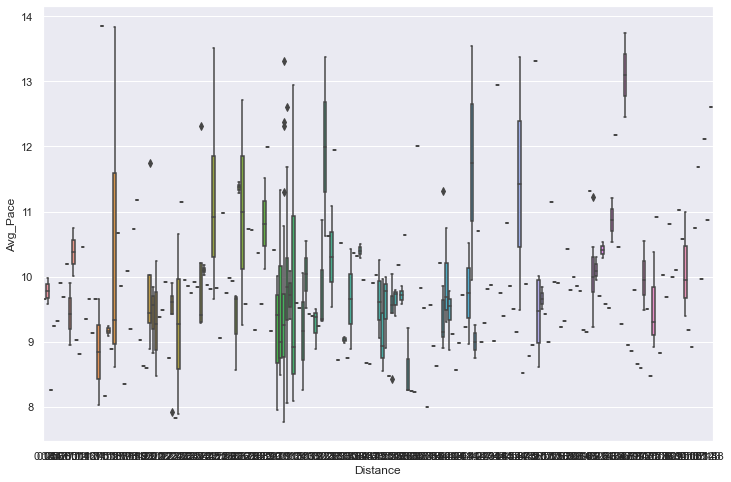

In [232]:
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.boxplot(x='Distance', y='Avg_Pace', data=df4)

In [233]:
dummy_variables = pd.get_dummies(df4[['Distance','Avg_Pace','Calories_Burned']], drop_first=True)
dummy_variables.shape
(2394, 57)
dummy_variables.head()

,Distance,Avg_Pace,Calories_Burned
4,6.38,12.17,618.0
6,4.63,13.37,576.0
7,7.02,10.54,863.0
8,6.35,11.21,626.0
9,6.35,10.53,797.0


In [234]:
from sklearn.preprocessing import MinMaxScaler 

In [235]:
num_features = df4[['Distance', 'Avg_Pace', 'Workout_Time', 'Calories_Burned']]
sc = MinMaxScaler()
num_features = sc.fit_transform(num_features)

In [236]:
cat_features = dummy_variables.values
data = np.concatenate((cat_features, num_features), axis=1)
X = data[:, :data.shape[1]-1]
y = data[:, data.shape[1]-1]
print(X.shape)
print(y.shape)
(2394, 60)
(2394,)

(492, 6)
(492,)


(2394,)

In [237]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [238]:
from sklearn.linear_model import Ridge
#Create a ridge regressor object
ridge = Ridge(alpha=0.5)
#Train the model
ridge.fit(X_train, y_train)
#Evaluate the model
print('R-squared score (training):{:.3f}'.
format(ridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
.format(ridge.score(X_test, y_test)))

R-squared score (training):1.000
R-squared score (test): 1.000


In [239]:
from sklearn.ensemble import GradientBoostingRegressor
#Create a GradientBoostingRegressor object
params = {'n_estimators': 600, 'max_depth': 5,
'learning_rate': 0.02, 'loss': 'ls'}
gbr = GradientBoostingRegressor(**params)
#Train the model
gbr.fit(X_train, y_train)
#Evaluate the model
print('R-squared score (training): {:.3f}'
.format(gbr.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
.format(gbr.score(X_test, y_test)))

R-squared score (training): 1.000
R-squared score (test): 0.999


## Data standardization

**Standardizing** data refers to transforming each variable so that it more closely follows a **standard** normal distribution, with mean 0 and standard deviation 1.

The [`StandardScaler`](http://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) object in SciKit Learn can do this.

**Generate X and y**:

In [240]:
y_col = "Distance"

X = df4.drop(y_col, axis=1)
y = df4[y_col]

**Import, fit, and transform using `StandardScaler`**

In [241]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_ss = s.fit_transform(X)

### Coefficients with and without scaling

In [242]:
lr = LinearRegression()

y_col = "Distance"

X = df4.drop(y_col, axis=1)
y = df4[y_col]

In [243]:
lr.fit(X, y)
print(lr.coef_) # min = -18

[ 8.87282613e-04  3.32050926e-02 -3.07379252e-01 -3.91391105e-02
 -9.59469365e-04  1.84726507e-04 -1.93592371e+00]


In [244]:
from sklearn.preprocessing import StandardScaler

In [245]:
s = StandardScaler()
X_ss = s.fit_transform(X)

In [246]:
lr2 = LinearRegression()
lr2.fit(X_ss, y)
print(lr2.coef_) # coefficients now "on the same scale"

[ 2.21830902e-01  4.12038116e+01 -3.16711292e-01 -2.37896198e-02
 -9.19700879e-03  5.88119590e-01 -4.00377830e+01]


In [247]:
### BEGIN SOLUTION

# Part 1

# Decreasing regularization and ensuring convergence
las001 = Lasso(alpha = 0.001, max_iter=100000)

# Transforming training set to get standardized units
X_train_s = s.fit_transform(X_train)

# Fitting model to training set
las001.fit(X_train_s, y_train)

# Transforming test set using the parameters defined from training set
X_test_s = s.transform(X_test)

# Finding prediction on test set
y_pred = las001.predict(X_test_s)

# Calculating r2 score
print("r2 score for alpha = 0.001:", r2_score(y_pred, y_test))


# Part 2

# Using vanilla Linear Regression
lr = LinearRegression()

# Fitting model to training set
lr.fit(X_train_s, y_train)

# predicting on test set
y_pred_lr = lr.predict(X_test_s)

# Calculating r2 score
print("r2 score for Linear Regression:", r2_score(y_pred_lr, y_test))


# Part 3
print('Magnitude of Lasso coefficients:', abs(las001.coef_).sum())
print('Number of coeffients not equal to 0 for Lasso:', (las001.coef_!=0).sum())

print('Magnitude of Linear Regression coefficients:', abs(lr.coef_).sum())
print('Number of coeffients not equal to 0 for Linear Regression:', (lr.coef_!=0).sum())
### END SOLUTION

r2 score for alpha = 0.001: 0.999936325876997
r2 score for Linear Regression: 1.0
Magnitude of Lasso coefficients: 0.12532299885553705
Number of coeffients not equal to 0 for Lasso: 1
Magnitude of Linear Regression coefficients: 0.1263229988555372
Number of coeffients not equal to 0 for Linear Regression: 5


## L1 vs. L2 Regularization

As mentioned in the deck: `Lasso` and `Ridge` regression have the same syntax in SciKit Learn.
[`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
Now we're going to compare the results from Ridge vs. Lasso regression:

[`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [248]:
from sklearn.linear_model import Ridge

In [249]:
### BEGIN SOLUTION
# Decreasing regularization and ensuring convergence
r = Ridge(alpha = 0.001)
X_train_s = s.fit_transform(X_train)
r.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred_r = r.predict(X_test_s)

# Calculating r2 score
r.coef_
### END SOLUTION

array([ 1.38847931e-06, -1.53984761e-07,  1.26316781e-01,  1.38847753e-06,
       -1.53985219e-07,  3.39688241e-06])

In [250]:
print(np.sum(np.abs(r.coef_)))
print(np.sum(np.abs(las001.coef_)))

print(np.sum(r.coef_ != 0))
print(np.sum(las001.coef_ != 0))

0.12632326249258485
0.12532299885553705
6
1


In [251]:
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.3, 
                                                    random_state=72018)

In [252]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_pred, y_test)

0.9815134489934575

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=72018)

In [254]:
s = StandardScaler()
lr_s = LinearRegression()
X_train_s = s.fit_transform(X_train)
lr_s.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred_s = lr_s.predict(X_test_s)
r2_score(y_pred_s, y_test)

0.9815134489934574